In [1]:
import pandas as pd
import numpy as np

import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


## Splitting & Using RF


In [5]:
import time
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(random_forest, X_train, y_train, cv=kf)

print(f"Cross-Validation Results: {cross_val_results}")
print(f"Mean Accuracy: {cross_val_results.mean():.2f}")

y_train_converted = y_train - 1

start_time = time.time()
random_forest.fit(X_train, y_train_converted)
end_time = time.time()
training_time = end_time - start_time

print(f"Training time: {training_time} seconds")

y_test_converted = y_test - 1

y_pred = random_forest.predict(X_test)


Cross-Validation Results: [0.93529412 0.94117647 0.93823529 0.94705882 0.92941176]
Mean Accuracy: 0.94
Training time: 0.21970176696777344 seconds


## Using Evaluation Metrics

Accuracy =  94.60093896713614 %
Precision =  0.9166177908113392
Recall =  0.8928804882468676
F1-score =  0.903036686182797


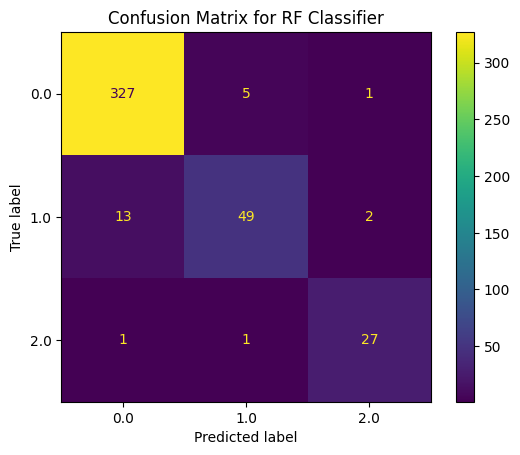

Classification Report
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       333
         1.0       0.89      0.77      0.82        64
         2.0       0.90      0.93      0.92        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.94      0.95      0.94       426



In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
ConfusionMatrixDisplay
)


print("Accuracy = ", accuracy_score(y_test_converted, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test_converted, y_pred, average='macro'))
print("Recall = ", recall_score(y_test_converted, y_pred, average='macro'))
print("F1-score = ", f1_score(y_test_converted, y_pred, average='macro'))

conf_matrix = confusion_matrix(y_test_converted, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_train_converted))
disp.plot()
plt.title('Confusion Matrix for RF Classifier')
plt.show()

print("Classification Report")
print(classification_report(y_test_converted, y_pred))


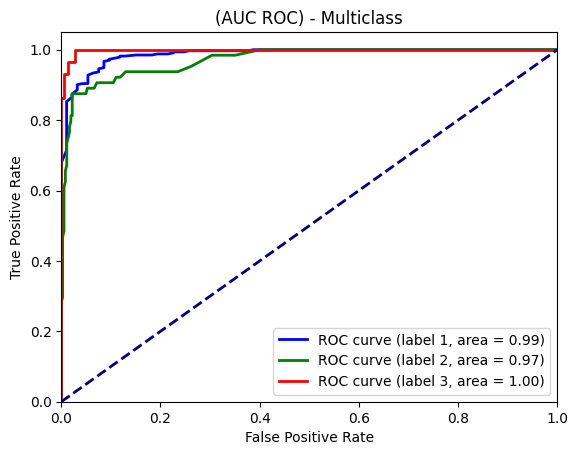

In [7]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = random_forest.predict_proba(X_test)

plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


In [8]:
# # # Use LIME to explain predictions on a single instance
# # from lime.lime_tabular import LimeTabularExplainer

# # explainer = LimeTabularExplainer(X_train.values, 
# #                                   feature_names=X_train.columns, 
# #                                   class_names=np.unique(y_train), 
# #                                   discretize_continuous=True)

# # instance_index = 15

# # instance_to_explain = X_test.iloc[[instance_index]]

# # # Get the model's prediction for the instance
# # predicted_class = random_forest.predict(instance_to_explain)[0]

# # # Explain the prediction using LIME
# # explanation = explainer.explain_instance(instance_to_explain.values[0], 
# #                                          random_forest.predict_proba, 
# #                                          num_features=5, 
# #                                          top_labels=3, 
# #                                          labels=[predicted_class])

# # # print(f"Predicted Class: {predicted_class}")
# # # explanation.show_in_notebook()

# # explanation.save_to_file('explanation.html')


# # from IPython.display import IFrame

# # IFrame(src='explanation.html', width=1000, height=1500)

# from lime.lime_tabular import LimeTabularExplainer
# from IPython.display import IFrame
# from lime import submodular_pick

# explainer = LimeTabularExplainer(X_train.values, 
#                                   feature_names=X_train.columns, 
#                                   class_names=np.unique(y_train), 
#                                   discretize_continuous=True)

# num_instances = 10 

# for instance_index in range(num_instances):
#     instance_to_explain = X_test.iloc[[instance_index]]

#     predicted_class = random_forest.predict(instance_to_explain)[0]

#     explanation = explainer.explain_instance(instance_to_explain.values[0], 
#                                              random_forest.predict_proba, 
#                                              num_features=5, 
#                                              top_labels=3, 
#                                              labels=[predicted_class])

#     print(f"Predicted Class for Instance {instance_index}: {predicted_class}")
#     explanation.show_in_notebook()

# # explanation.save_to_file('explanation.html')

# # IFrame(src='explanation.html', width=1000, height=1500)


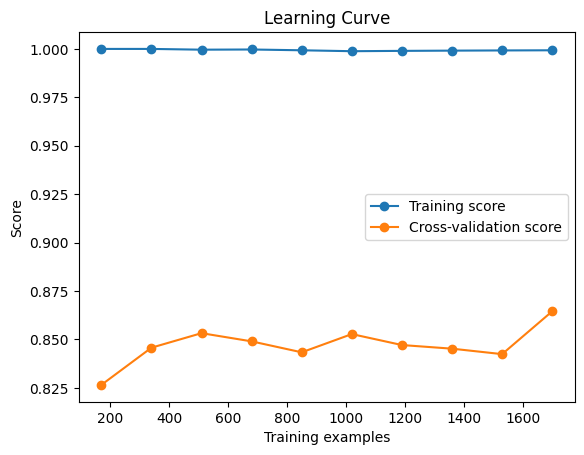

In [9]:
train_sizes, train_scores, test_scores = learning_curve(random_forest, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

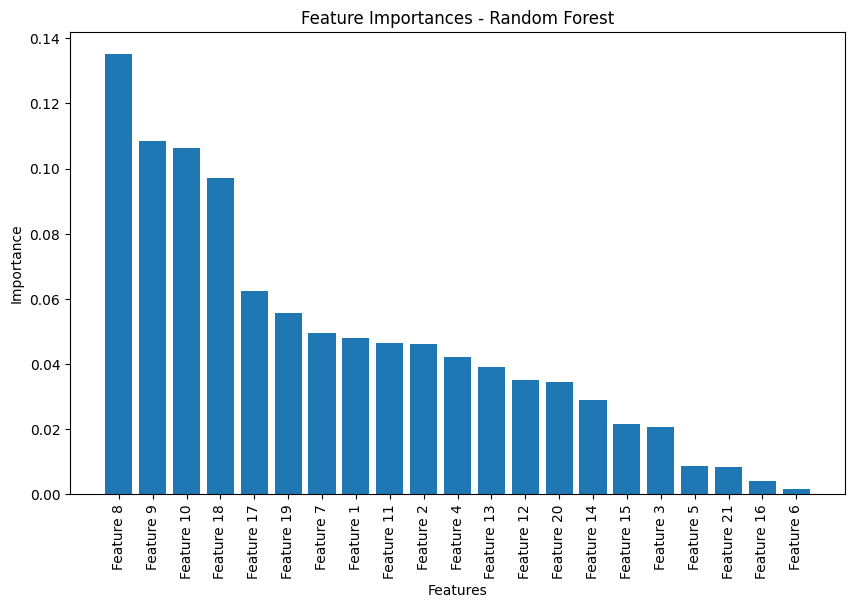

In [10]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

feature_importances = random_forest.feature_importances_
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances))]
sorted_idx = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation='vertical')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [11]:
top_k_features_indices = sorted_idx[:16]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]

Indices of Important Features: [ 7  8  9 17 16 18  6  0 10  1  3 12 11 19 13 14]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


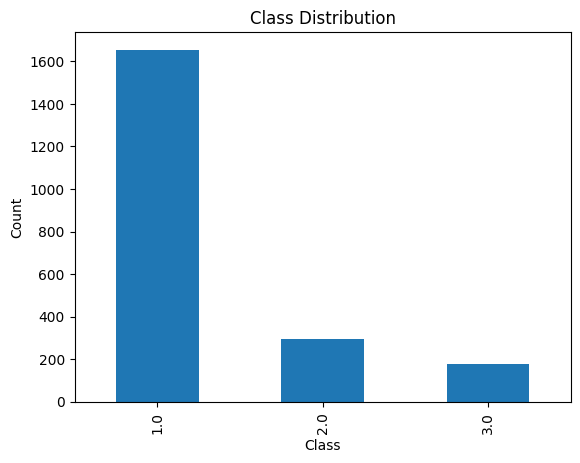

In [12]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [13]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# X_test_aligned = X_test[X_resampled.columns]

Class Distribution:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


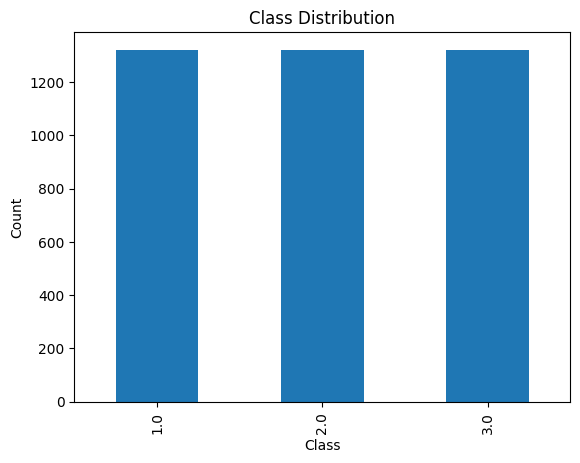

In [14]:


class_distribution = y_resampled.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using RF

In [15]:

random_forest_after = RandomForestClassifier()
random_forest_after.fit(X_resampled, y_resampled)
# y_pred_after = random_forest_after.predict(X_test)

y_pred_full = random_forest_after.predict(X_resampled)
y_pred_test = random_forest_after.predict(X_test)

# print(len(y_test), len(y_pred_test))


Metrics on Resampled Training Set:
Accuracy (Resampled): 1.0
Precision (macro, Resampled): 1.0
Recall (macro, Resampled): 1.0
F1-score (macro, Resampled): 1.0


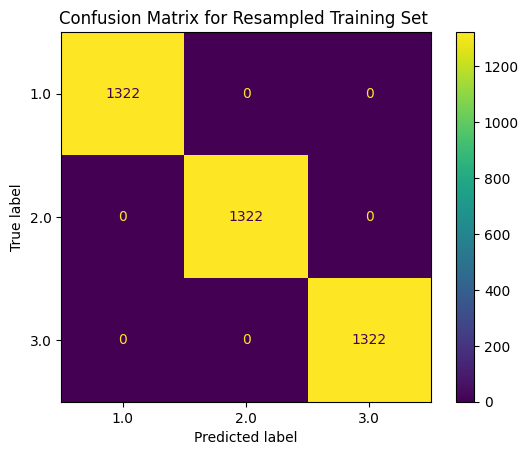


Metrics on Test Set:
Test Accuracy: 0.9389671361502347
Test Precision (macro): 0.8815259232527367
Test Recall (macro): 0.9214073987780885
Test F1-score (macro): 0.9004377464538166


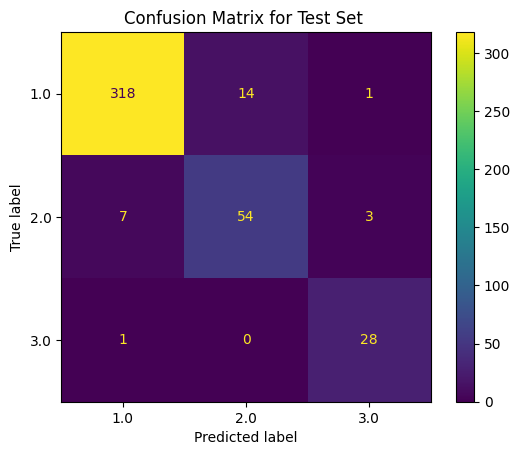

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate on the resampled training set
accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)

print("Metrics on Resampled Training Set:")
print("Accuracy (Resampled):", accuracy_resampled)
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

# Display confusion matrix for resampled training set
disp_resampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_resampled, display_labels=np.unique(y))
disp_resampled.plot()
plt.title('Confusion Matrix for Resampled Training Set ')
plt.show()

# Evaluate on the original test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("\nMetrics on Test Set:")
print("Test Accuracy:", accuracy_test)
print("Test Precision (macro):", precision_test)
print("Test Recall (macro):", recall_test)
print("Test F1-score (macro):", f1_test)

# Display confusion matrix for test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=np.unique(y))
disp_test.plot()
plt.title('Confusion Matrix for Test Set ')
plt.show()


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Assuming you have already defined X_selected, y

# k-Fold with SMOTE
kf = KFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_kfold = []
precision_scores_kfold = []
recall_scores_kfold = []
f1_scores_kfold = []

for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Random Forest on resampled training set
    random_forest_after = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = random_forest_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_kfold.append(accuracy_test)
    precision_scores_kfold.append(precision_test)
    recall_scores_kfold.append(recall_test)
    f1_scores_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_kfold = np.mean(accuracy_scores_kfold)
mean_precision_kfold = np.mean(precision_scores_kfold)
mean_recall_kfold = np.mean(recall_scores_kfold)
mean_f1_kfold = np.mean(f1_scores_kfold)

print(f'k-Fold Metrics (Mean): Accuracy={mean_accuracy_kfold}, Precision={mean_precision_kfold}, Recall={mean_recall_kfold}, F1-Score={mean_f1_kfold}')


k-Fold Metrics (Mean): Accuracy=0.9388584455489005, Precision=0.8953387604822758, Recall=0.9050886659764911, F1-Score=0.8991814274290242


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Assuming you have already defined X_selected, y

# Stratified k-Fold with SMOTE
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_stratified_kfold = []
precision_scores_stratified_kfold = []
recall_scores_stratified_kfold = []
f1_scores_stratified_kfold = []

for train_index, test_index in skf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Random Forest on resampled training set
    random_forest_after = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = random_forest_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_stratified_kfold.append(accuracy_test)
    precision_scores_stratified_kfold.append(precision_test)
    recall_scores_stratified_kfold.append(recall_test)
    f1_scores_stratified_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_stratified_kfold = np.mean(accuracy_scores_stratified_kfold)
mean_precision_stratified_kfold = np.mean(precision_scores_stratified_kfold)
mean_recall_stratified_kfold = np.mean(recall_scores_stratified_kfold)
mean_f1_stratified_kfold = np.mean(f1_scores_stratified_kfold)

print(f'Stratified k-Fold Metrics (Mean): Accuracy={mean_accuracy_stratified_kfold}, Precision={mean_precision_stratified_kfold}, Recall={mean_recall_stratified_kfold}, F1-Score={mean_f1_stratified_kfold}')


Stratified k-Fold Metrics (Mean): Accuracy=0.9388584455489004, Precision=0.8863748664937614, Recall=0.9042979151006023, F1-Score=0.8946038961416203


## Using Evaluation Metrics

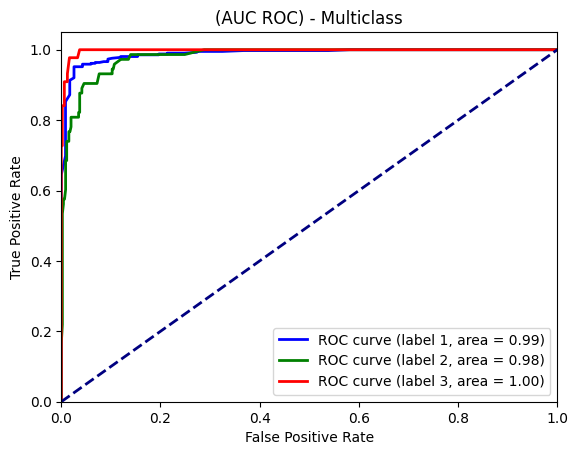

In [19]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = random_forest_after.predict_proba(X_test)


plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


In [20]:
# from lime import lime_tabular

# X_resampled = pd.DataFrame(X_train, columns=X.columns)

# explainer = lime_tabular.LimeTabularExplainer(X_train.values, 
#                                               mode='classification', 
#                                               feature_names=X.columns.tolist())

# instance_to_explain = X_test.iloc[0]

# exp = explainer.explain_instance(instance_to_explain.values, random_forest_after.predict_proba)

# exp.save_to_file('explanation.html')

# from IPython.display import IFrame

# IFrame(src='explanation.html', width=1100, height=1400)



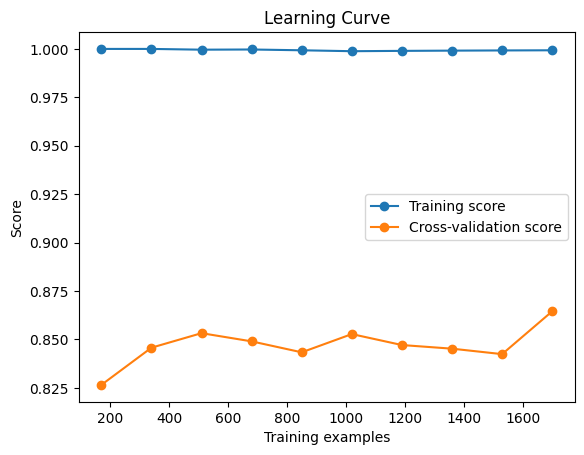

In [21]:
train_sizes, train_scores, test_scores = learning_curve(random_forest_after, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

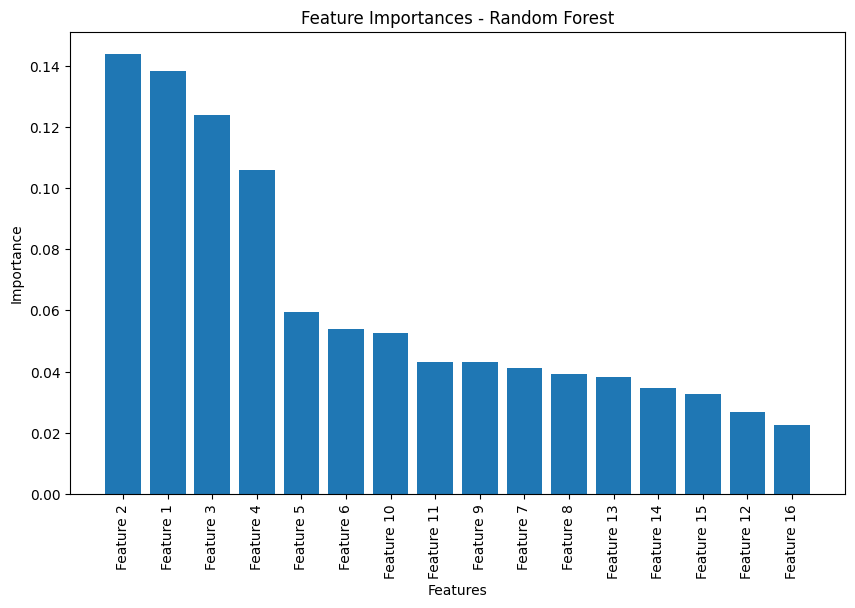

In [22]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

feature_importances = random_forest.feature_importances_
feature_names = [f"Feature {i+1}" for i in range(len(feature_importances))]
sorted_idx = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation='vertical')
plt.title("Feature Importances - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


In [23]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
# from sklearn.ensemble import RandomForestClassifier

# cv_scores_holdout = []
# cv_scores_kfold = []
# cv_scores_stratified_kfold = []

# X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# random_forest_classifier.fit(X_train, y_train)

# scores_holdout = cross_val_score(random_forest_after, X_train, y_train, cv=2, scoring='accuracy')
# cv_scores_holdout.append(scores_holdout.mean())
# print(f'Holdout CV : {scores_holdout.mean()}')

# kf = KFold(n_splits=4, shuffle=True, random_state=42)
# scores_kfold = cross_val_score(random_forest_after, X_selected, y, cv=kf, scoring='accuracy')
# cv_scores_kfold.append(scores_kfold.mean())
# print(f'k-Fold CV : {scores_kfold.mean()}')

# skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
# scores_stratified_kfold = cross_val_score(random_forest_after, X_selected, y, cv=skf, scoring='accuracy')
# cv_scores_stratified_kfold.append(scores_stratified_kfold.mean())
# print(f'Stratified k-Fold CV: {scores_stratified_kfold.mean()}')

# plt.figure(figsize=(8, 6))
# plt.bar(['Holdout', 'k-Fold', 'Stratified k-Fold'],
#         [cv_scores_holdout[0], cv_scores_kfold[0], cv_scores_stratified_kfold[0]])
# plt.title(f'Random Forest Performance Comparison for Selected Features')
# plt.ylabel('Cross-Validation Accuracy')
# plt.ylim([0, 1])
# plt.show()
